In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Geometric Transformations of Images
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations
* Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
* You will see these functions: cv2.getPerspectiveTransform


## Transformations
OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. 
cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.

### Scaling

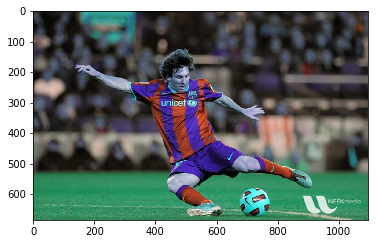

In [2]:
img = cv2.imread('messi5.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

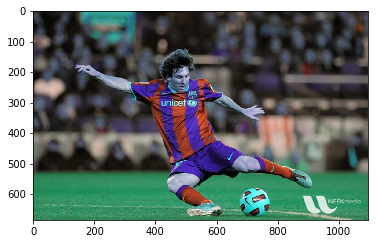

In [3]:
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

### Translation

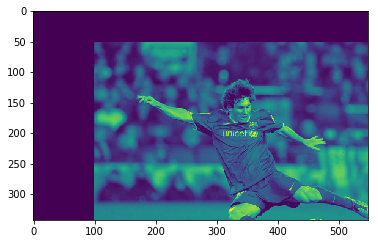

In [4]:
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

### Rotation

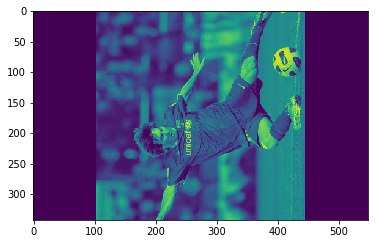

In [6]:
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

## Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. 
To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

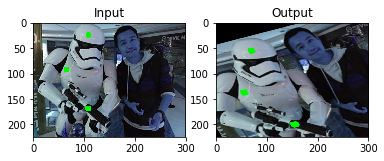

In [8]:
img = cv2.imread('img-300x225.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformation

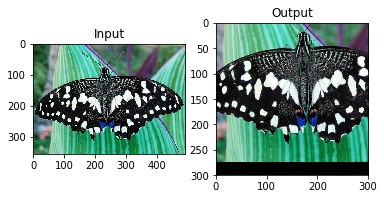

In [9]:
img = cv2.imread('butterfly.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()